# Telecom Churn Case Study

In [1]:
#importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#suppress warning
import warnings
warnings.filterwarnings("ignore")

#### Read in the dataset

In [3]:
telecom_churn = pd.read_csv("telecom_churn_data.csv")

In [4]:
# set pandas set option to display all columns
pd.set_option("display.max_columns", None)

# display few rows of dataset
telecom_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
# Check the shape of dataset
telecom_churn.shape

(99999, 226)

In [6]:
# find & delete the columns which have only one unique values

# find the columns which have only one unique value
cols_one_unique=[]
for i in telecom_churn.columns:
    if len(telecom_churn[i].value_counts())==1:
        cols_one_unique.append(i)
    
# Delete the columns which have only one unique value
telecom_churn = telecom_churn.drop(cols_one_unique, axis =1)

In [7]:
# Check the shape of dataset
telecom_churn.shape

(99999, 210)

In [8]:
# changing column names having string "june", "july", "aug", "sep". replacing these strings with numerical value
telecom_churn = telecom_churn.rename({'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'}, axis=1)

### Derive new features

In [9]:
# Creating a column of avg total recharge amount for 6th and 7 th months. 

In [10]:
# lets check null values in recharge columns
telecom_churn[['total_rech_amt_6','av_rech_amt_data_6', 'total_rech_data_6','total_rech_amt_7','av_rech_amt_data_7', 'total_rech_data_7','total_rech_amt_8','av_rech_amt_data_8', 'total_rech_data_8']].isna().sum()

total_rech_amt_6          0
av_rech_amt_data_6    74846
total_rech_data_6     74846
total_rech_amt_7          0
av_rech_amt_data_7    74428
total_rech_data_7     74428
total_rech_amt_8          0
av_rech_amt_data_8    73660
total_rech_data_8     73660
dtype: int64

- Lot of values are missing in rech columns, this might be due to customer might not have recharged for the services
- Impute the missing values with 0

In [11]:
# Imputing rech columns with 0
telecom_churn['total_rech_data_6'] = telecom_churn['total_rech_data_6'].replace(np.NaN,0.0)
telecom_churn['total_rech_data_7'] = telecom_churn['total_rech_data_7'].replace(np.NaN,0.0)
telecom_churn['total_rech_data_8'] = telecom_churn['total_rech_data_8'].replace(np.NaN,0.0)

In [12]:
telecom_churn['av_rech_amt_data_6'] = telecom_churn['av_rech_amt_data_6'].replace(np.NaN,0.0)
telecom_churn['av_rech_amt_data_7'] = telecom_churn['av_rech_amt_data_7'].replace(np.NaN,0.0)
telecom_churn['av_rech_amt_data_8'] = telecom_churn['av_rech_amt_data_8'].replace(np.NaN,0.0)

In [13]:
# let's adding new column total recharge amount for data: total_rech_amt_data for calculating High Value customer process
telecom_churn['total_rech_amt_data_6'] = telecom_churn.av_rech_amt_data_6 * telecom_churn.total_rech_data_6
telecom_churn['total_rech_amt_data_7'] = telecom_churn.av_rech_amt_data_7 * telecom_churn.total_rech_data_7
telecom_churn['total_rech_amt_data_8'] = telecom_churn.av_rech_amt_data_8 * telecom_churn.total_rech_data_8

In [14]:
# finding the avarage recharge amount for the months june and july
telecom_churn['avg_rech_amt_6&7'] = (telecom_churn.total_rech_amt_6 + telecom_churn.total_rech_amt_7)/2

#### filter high value customers

In [15]:
# filtering high value customers whose 6th and 7th month avg recharge is more than 70th percentile of 6th and 7th month avg recharge amount
telecom_churn = telecom_churn[telecom_churn['avg_rech_amt_6&7']>=telecom_churn['avg_rech_amt_6&7'].quantile(0.7)]


In [16]:
telecom_churn.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,avg_rech_amt_6&7
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,6/27/2014,7/25/2014,8/26/2014,9/30/2014,0,0,779,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,

In [17]:
# drop the column 'avg_rech_amt_6&7' 
telecom_churn.drop('avg_rech_amt_6&7', axis = 1, inplace = True)

In [18]:
# Checking dataset shape
telecom_churn.shape

(30011, 213)

#### Tag churners and remove attributes of the churn phase

In [19]:
# tag churners whoose incoming , outgoing call minutes is zero and mobile internet usage volume is zero in 9th month 
telecom_churn["churn"]=telecom_churn['total_ic_mou_9'] + telecom_churn['total_og_mou_9'] + telecom_churn['vol_2g_mb_9'] + telecom_churn['vol_3g_mb_9']

telecom_churn.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,churn
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,6/27/2014,7/25/2014,8/26/2014,9/30/2014,0,0,779,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [20]:
# Convert the churn to 0 or 1
telecom_churn['churn'] = telecom_churn['churn'].apply(lambda x:1 if x==0 else 0)

# Check the shape of dataset
telecom_churn.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,churn
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,6/27/2014,7/25/2014,8/26/2014,9/30/2014,0,0,779,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [21]:
# deleting attributes pertaining to 9th month (churn period)
attr_churn_period = []
for i in telecom_churn.columns:
    if i[-1]=='9':
        attr_churn_period.append(i)

telecom_churn.drop(columns = attr_churn_period, axis = 1, inplace =True)

In [22]:
# Check the shape of dataset
telecom_churn.shape

(30011, 162)

In [23]:
# checking for duplicate rows
Duplicates = telecom_churn.copy()
Duplicates = Duplicates.drop_duplicates()
Duplicates.shape

(30011, 162)

- There are no duplicate rows

In [24]:
# Check the info of columns till 100th column
telecom_churn.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 30011 entries, 7 to 99997
Data columns (total 162 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    arpu_6                    float64
 2    arpu_7                    float64
 3    arpu_8                    float64
 4    onnet_mou_6               float64
 5    onnet_mou_7               float64
 6    onnet_mou_8               float64
 7    offnet_mou_6              float64
 8    offnet_mou_7              float64
 9    offnet_mou_8              float64
 10   roam_ic_mou_6             float64
 11   roam_ic_mou_7             float64
 12   roam_ic_mou_8             float64
 13   roam_og_mou_6             float64
 14   roam_og_mou_7             float64
 15   roam_og_mou_8             float64
 16   loc_og_t2t_mou_6          float64
 17   loc_og_t2t_mou_7          float64
 18   loc_og_t2t_mou_8          float64
 19   loc_og_t2m_mou_6          float64
 20   loc_og_t2

- There are some columns with "object" data type lets convert them to proper data type

In [25]:
# Convert the data type of date columns to 'datetime' data type
cols_date = ["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8","date_of_last_rech_data_6", "date_of_last_rech_data_7", "date_of_last_rech_data_8"]
for i in cols_date:
    telecom_churn[i] = pd.to_datetime(telecom_churn[i], format="%m/%d/%Y")
    

In [26]:
# Check the info of columns till 100th column
telecom_churn.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 30011 entries, 7 to 99997
Data columns (total 162 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    mobile_number             int64         
 1    arpu_6                    float64       
 2    arpu_7                    float64       
 3    arpu_8                    float64       
 4    onnet_mou_6               float64       
 5    onnet_mou_7               float64       
 6    onnet_mou_8               float64       
 7    offnet_mou_6              float64       
 8    offnet_mou_7              float64       
 9    offnet_mou_8              float64       
 10   roam_ic_mou_6             float64       
 11   roam_ic_mou_7             float64       
 12   roam_ic_mou_8             float64       
 13   roam_og_mou_6             float64       
 14   roam_og_mou_7             float64       
 15   roam_og_mou_8             float64       
 16   loc_og_t2t_mou_6          float64       
 1

- Now all columns are of proper data type

### Missing values treatment

In [27]:
# Check the percentage of missing values in columns
Null_count = pd.DataFrame({'Null_Percentage': round(telecom_churn.isnull().sum()/len(telecom_churn) * 100 , 2)}).sort_values(by='Null_Percentage', ascending=False)
missing = Null_count[Null_count['Null_Percentage']>0]
missing

,Null_Percentage
arpu_3g_6,62.02
night_pck_user_6,62.02
fb_user_6,62.02
date_of_last_rech_data_6,62.02
max_rech_data_6,62.02
...,...
isd_og_mou_7,1.01
spl_ic_mou_7,1.01
std_og_mou_7,1.01
date_of_last_rech_7,0.38


- all columns with missing values more than 50% are related to recharge and for each month there vales are same, 
This can be due to the there were no recharges done by the customer in that perticular month
Lets impute these values with 0

In [28]:
# Lets create lists of columns with high and low number of missing values
cols_high_missing = list(missing[missing['Null_Percentage'] >= 30].index)
cols_low_missing = list(missing[missing['Null_Percentage'] < 30].index)

print(cols_high_missing)
print('-'*194)
print('Number of high missing values columns =',len(cols_high_missing))
print('-'*194)
print(cols_low_missing)
print('Number of high missing values columns =',len(cols_high_missing))
print('-'*194)
print(len(cols_low_missing))
print('-'*194)

['arpu_3g_6', 'night_pck_user_6', 'fb_user_6', 'date_of_last_rech_data_6', 'max_rech_data_6', 'count_rech_3g_6', 'count_rech_2g_6', 'arpu_2g_6', 'max_rech_data_7', 'fb_user_7', 'night_pck_user_7', 'arpu_3g_7', 'count_rech_3g_7', 'arpu_2g_7', 'date_of_last_rech_data_7', 'count_rech_2g_7', 'fb_user_8', 'arpu_3g_8', 'date_of_last_rech_data_8', 'night_pck_user_8', 'arpu_2g_8', 'max_rech_data_8', 'count_rech_3g_8', 'count_rech_2g_8']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Number of high missing values columns = 24
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
['og_others_8', 'isd_og_mou_8', 'spl_ic_mou_8', 'std_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_mou_8'

In [29]:
#Check info of high missing values columns
telecom_churn[cols_high_missing].info()

<class 'pandas.core.frame.DataFrame'>
Index: 30011 entries, 7 to 99997
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   arpu_3g_6                 11397 non-null  float64       
 1   night_pck_user_6          11397 non-null  float64       
 2   fb_user_6                 11397 non-null  float64       
 3   date_of_last_rech_data_6  11397 non-null  datetime64[ns]
 4   max_rech_data_6           11397 non-null  float64       
 5   count_rech_3g_6           11397 non-null  float64       
 6   count_rech_2g_6           11397 non-null  float64       
 7   arpu_2g_6                 11397 non-null  float64       
 8   max_rech_data_7           11662 non-null  float64       
 9   fb_user_7                 11662 non-null  float64       
 10  night_pck_user_7          11662 non-null  float64       
 11  arpu_3g_7                 11662 non-null  float64       
 12  count_rech_3g_7        

In [30]:
cols_high_missing

['arpu_3g_6',
 'night_pck_user_6',
 'fb_user_6',
 'date_of_last_rech_data_6',
 'max_rech_data_6',
 'count_rech_3g_6',
 'count_rech_2g_6',
 'arpu_2g_6',
 'max_rech_data_7',
 'fb_user_7',
 'night_pck_user_7',
 'arpu_3g_7',
 'count_rech_3g_7',
 'arpu_2g_7',
 'date_of_last_rech_data_7',
 'count_rech_2g_7',
 'fb_user_8',
 'arpu_3g_8',
 'date_of_last_rech_data_8',
 'night_pck_user_8',
 'arpu_2g_8',
 'max_rech_data_8',
 'count_rech_3g_8',
 'count_rech_2g_8']

In [31]:
# drop the above columns which have high values of unexplainable missing values
for i in cols_high_missing:
    telecom_churn = telecom_churn.drop(i, axis = 1)

In [32]:
# lets impute the date columns with most occuring date
telecom_churn['date_of_last_rech_6'] = telecom_churn['date_of_last_rech_6'].fillna(telecom_churn['date_of_last_rech_6'].mode()[0])
telecom_churn['date_of_last_rech_7'] = telecom_churn['date_of_last_rech_7'].fillna(telecom_churn['date_of_last_rech_7'].mode()[0])
telecom_churn['date_of_last_rech_8'] = telecom_churn['date_of_last_rech_8'].fillna(telecom_churn['date_of_last_rech_8'].mode()[0])

In [33]:
# lets remove date columns from cols_low_missing 
cols_low_missing.remove('date_of_last_rech_6')
cols_low_missing.remove('date_of_last_rech_7')
cols_low_missing.remove('date_of_last_rech_8')

In [34]:
#lets check the info of low missing columns
telecom_churn[cols_low_missing].info()

<class 'pandas.core.frame.DataFrame'>
Index: 30011 entries, 7 to 99997
Data columns (total 81 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   og_others_8       29073 non-null  float64
 1   isd_og_mou_8      29073 non-null  float64
 2   spl_ic_mou_8      29073 non-null  float64
 3   std_og_mou_8      29073 non-null  float64
 4   loc_ic_t2t_mou_8  29073 non-null  float64
 5   loc_ic_mou_8      29073 non-null  float64
 6   std_ic_t2t_mou_8  29073 non-null  float64
 7   std_ic_mou_8      29073 non-null  float64
 8   loc_ic_t2f_mou_8  29073 non-null  float64
 9   spl_og_mou_8      29073 non-null  float64
 10  std_ic_t2m_mou_8  29073 non-null  float64
 11  isd_ic_mou_8      29073 non-null  float64
 12  std_ic_t2f_mou_8  29073 non-null  float64
 13  std_og_t2f_mou_8  29073 non-null  float64
 14  loc_og_mou_8      29073 non-null  float64
 15  loc_og_t2f_mou_8  29073 non-null  float64
 16  roam_og_mou_8     29073 non-null  float64
 17

In [35]:
# lets extract minutes of usage columns 
mou = telecom_churn[cols_low_missing].columns[telecom_churn[cols_low_missing].columns.str.contains('mou')]
mou

Index(['isd_og_mou_8', 'spl_ic_mou_8', 'std_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_mou_8', 'loc_ic_t2f_mou_8',
       'spl_og_mou_8', 'std_ic_t2m_mou_8', 'isd_ic_mou_8', 'std_ic_t2f_mou_8',
       'std_og_t2f_mou_8', 'loc_og_mou_8', 'loc_og_t2f_mou_8', 'roam_og_mou_8',
       'std_og_t2m_mou_8', 'onnet_mou_8', 'std_og_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'offnet_mou_8', 'loc_og_t2c_mou_8', 'roam_ic_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2t_mou_8', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'isd_ic_mou_6', 'std_ic_mou_6',
       'spl_ic_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_og_mou_6',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'loc_og_t2c_mou_6',
       'roam_ic_mou_6', 'isd_og_mou_6', 'offnet_mou_6', 'spl_og_mou_6',
       'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_ic_t2m_mou_6', 'loc_og_mou_6',
       'loc_ic_t2t_mou_6', 'std_og_t2f_mou_6', 'onnet_mou_

- It is possible that customers might not have used the service for that perticular MOU service, we can impute these with 0

In [36]:
# Impute 'mou' columns missing values with 0
telecom_churn[mou] = telecom_churn[mou].fillna(0)

In [37]:
for i in mou:
    cols_low_missing.remove(i)

In [38]:
cols_low_missing

['og_others_8',
 'ic_others_8',
 'ic_others_6',
 'og_others_6',
 'ic_others_7',
 'og_others_7']

- above columns seems to have missing values for the reason customer not availing service lets impute these also with 0. also missing values percentage is less this will not affect the analysis

In [39]:
telecom_churn[cols_low_missing]

,og_others_8,ic_others_8,ic_others_6,og_others_6,ic_others_7,og_others_7
7,0.0,15.14,15.74,0.00,15.19,0.0
8,0.0,0.00,0.00,0.00,0.00,0.0
13,0.0,21.44,83.48,0.00,16.24,0.0
16,0.0,0.00,0.00,0.00,0.00,0.0
17,0.0,0.00,0.00,0.93,0.00,0.0
...,...,...,...,...,...,...
99970,0.0,2.66,0.00,0.00,2.80,0.0
99974,0.0,0.00,0.00,3.08,1.61,0.0
99986,0.0,0.00,0.00,0.00,0.00,0.0
99988,0.0,0.31,0.20,0.00,0.00,0.0


In [40]:
# Impute remaining low missing columns with mean
telecom_churn[cols_low_missing] = telecom_churn[cols_low_missing].fillna(0)

In [41]:
# Check missing values in low missing columns
telecom_churn[cols_low_missing].isna().sum().sort_values(ascending = False)

og_others_8    0
ic_others_8    0
ic_others_6    0
og_others_6    0
ic_others_7    0
og_others_7    0
dtype: int64

In [42]:
# setting display option to display 200 rows
pd.set_option("display.max_rows", 200)

In [43]:
#Lets check the missing values in entire data set
telecom_churn.isna().sum().sort_values(ascending = False)

mobile_number            0
total_rech_amt_6         0
ic_others_6              0
ic_others_7              0
ic_others_8              0
total_rech_num_6         0
total_rech_num_7         0
total_rech_num_8         0
total_rech_amt_7         0
last_day_rch_amt_6       0
total_rech_amt_8         0
max_rech_amt_6           0
max_rech_amt_7           0
max_rech_amt_8           0
date_of_last_rech_6      0
date_of_last_rech_7      0
isd_ic_mou_8             0
isd_ic_mou_7             0
isd_ic_mou_6             0
spl_ic_mou_8             0
spl_ic_mou_7             0
spl_ic_mou_6             0
total_ic_mou_8           0
total_ic_mou_7           0
total_ic_mou_6           0
std_ic_mou_8             0
std_ic_mou_7             0
std_ic_mou_6             0
std_ic_t2f_mou_8         0
std_ic_t2f_mou_7         0
std_ic_t2f_mou_6         0
std_ic_t2m_mou_8         0
std_ic_t2m_mou_7         0
date_of_last_rech_8      0
last_day_rch_amt_7       0
arpu_6                   0
sachet_3g_8              0
s

- There are mno missing values

In [44]:
telecom_churn.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,0.0,0.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,2014-06-25,2014-07-31,2014-08-30,50,0,10,0.0,2.0,3.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,354.0,207.0,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.

In [45]:
# Date columns are not useful for the analysis lets drop them
telecom_churn.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], axis = 1 , inplace = True)

In [46]:
# Mobile number is not useful for the analysis, lets remove it
telecom_churn.drop('mobile_number', axis = 1 , inplace = True)

In [47]:
# Looking at the unique values of all the columns
pd.set_option('display.max_rows', 200)
telecom_churn.nunique().sort_values(ascending = True)

churn                        2
monthly_2g_6                 5
monthly_2g_7                 6
monthly_2g_8                 6
monthly_3g_8                12
monthly_3g_6                12
monthly_3g_7                15
sachet_3g_6                 25
sachet_3g_7                 27
sachet_3g_8                 29
sachet_2g_6                 30
sachet_2g_7                 34
sachet_2g_8                 34
total_rech_data_6           37
total_rech_data_7           41
total_rech_data_8           46
spl_ic_mou_6                78
spl_ic_mou_8                85
spl_ic_mou_7                93
total_rech_num_8            96
total_rech_num_7           101
total_rech_num_6           102
og_others_7                123
og_others_8                133
last_day_rch_amt_7         149
max_rech_amt_7             151
last_day_rch_amt_6         158
max_rech_amt_6             170
last_day_rch_amt_8         179
max_rech_amt_8             182
av_rech_amt_data_6         795
av_rech_amt_data_8         838
og_other

In [48]:
# convert the columns having less than <=35 to categorical as from above they seems like ordinal values like dat packs etc.
cols_to_cat = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 
               'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
               'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
               'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8'
              ]

#telecom_churn[cols_to_cat]=telecom_churn[cols_to_cat].astype('category')

In [49]:
telecom_churn.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 30011 entries, 7 to 99997
Data columns (total 134 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    arpu_6                 float64
 1    arpu_7                 float64
 2    arpu_8                 float64
 3    onnet_mou_6            float64
 4    onnet_mou_7            float64
 5    onnet_mou_8            float64
 6    offnet_mou_6           float64
 7    offnet_mou_7           float64
 8    offnet_mou_8           float64
 9    roam_ic_mou_6          float64
 10   roam_ic_mou_7          float64
 11   roam_ic_mou_8          float64
 12   roam_og_mou_6          float64
 13   roam_og_mou_7          float64
 14   roam_og_mou_8          float64
 15   loc_og_t2t_mou_6       float64
 16   loc_og_t2t_mou_7       float64
 17   loc_og_t2t_mou_8       float64
 18   loc_og_t2m_mou_6       float64
 19   loc_og_t2m_mou_7       float64
 20   loc_og_t2m_mou_8       float64
 21   loc_og_t2f_mou_6       float64
 22   l

In [50]:
# Lets look at the levels in the 'monthly_2g_6'  columns
print(telecom_churn['monthly_2g_6'].value_counts(normalize = True)*100)

monthly_2g_6
0    88.907401
1     9.833061
2     1.149578
3     0.086635
4     0.023325
Name: proportion, dtype: float64


In [51]:
# combine levels 3 & 4 as 'others'
telecom_churn['monthly_2g_6'] = telecom_churn['monthly_2g_6'].replace([3,4], 'others')
print(telecom_churn['monthly_2g_6'].value_counts(normalize = True)*100)

monthly_2g_6
0         88.907401
1          9.833061
2          1.149578
others     0.109960
Name: proportion, dtype: float64


In [52]:
# Lets look at the levels in the 'monthly_2g_7'  columns
print(telecom_churn['monthly_2g_7'].value_counts(normalize = True)*100)

monthly_2g_7
0    88.487555
1    10.039652
2     1.352837
3     0.096631
4     0.016661
5     0.006664
Name: proportion, dtype: float64


In [53]:
# combine levels 3, 4 & 5 as 'others'
telecom_churn['monthly_2g_7'] = telecom_churn['monthly_2g_7'].replace([3,4,5], 'others')
print(telecom_churn['monthly_2g_7'].value_counts(normalize = True)*100)

monthly_2g_7
0         88.487555
1         10.039652
2          1.352837
others     0.119956
Name: proportion, dtype: float64


In [54]:
# Lets look at the levels in the 'monthly_2g_8'  columns
print(telecom_churn['monthly_2g_8'].value_counts(normalize = True)*100)

monthly_2g_8
0    89.760421
1     9.199960
2     0.942988
3     0.073306
4     0.016661
5     0.006664
Name: proportion, dtype: float64


In [55]:
# combine levels 3, 4 & 5 as 'others'
telecom_churn['monthly_2g_8'] = telecom_churn['monthly_2g_8'].replace([3,4,5], 'others')
print(telecom_churn['monthly_2g_8'].value_counts(normalize = True)*100)

monthly_2g_8
0         89.760421
1          9.199960
2          0.942988
others     0.096631
Name: proportion, dtype: float64


In [56]:
# Lets look at the levels in the 'monthly_3g_6'  columns
print(telecom_churn['monthly_3g_6'].value_counts(normalize = True)*100)

monthly_3g_6
0     88.074373
1      8.466895
2      2.322482
3      0.689747
4      0.246576
5      0.106628
6      0.036653
7      0.029989
8      0.009996
9      0.006664
11     0.006664
14     0.003332
Name: proportion, dtype: float64


In [57]:
# combine levels 3 , 4 , 5 , 6, 7, 8, 9, 11,14 as 'others'
telecom_churn['monthly_3g_6'] = telecom_churn['monthly_3g_6'].replace([3 , 4 , 5 , 6, 7, 8, 9, 11,14], 'others')
print(telecom_churn['monthly_3g_6'].value_counts(normalize = True)*100)

monthly_3g_6
0         88.074373
1          8.466895
2          2.322482
others     1.136250
Name: proportion, dtype: float64


In [58]:
# Lets look at the levels in the 'monthly_3g_7'  columns
print(telecom_churn['monthly_3g_7'].value_counts(normalize = True)*100)

monthly_3g_7
0     87.837793
1      8.216987
2      2.738996
3      0.689747
4      0.226584
5      0.129952
6      0.076639
7      0.033321
8      0.016661
9      0.013328
11     0.006664
12     0.003332
14     0.003332
10     0.003332
16     0.003332
Name: proportion, dtype: float64


In [59]:
# combine levels 3 , 4 , 5 , 6, 7, 8, 9,10, 11 ,12, 14, 16 as 'others'
telecom_churn['monthly_3g_7'] = telecom_churn['monthly_3g_7'].replace([3 , 4 , 5 , 6, 7, 8, 9,10, 11 ,12, 14, 16], 'others')
print(telecom_churn['monthly_3g_7'].value_counts(normalize = True)*100)

monthly_3g_7
0         87.837793
1          8.216987
2          2.738996
others     1.206224
Name: proportion, dtype: float64


In [60]:
# Lets look at the levels in the 'monthly_3g_8'  columns
print(telecom_churn['monthly_3g_8'].value_counts(normalize = True)*100)

monthly_3g_8
0     88.387591
1      8.007064
2      2.452434
3      0.656426
4      0.289894
5      0.099963
6      0.046650
7      0.029989
8      0.009996
9      0.009996
10     0.006664
16     0.003332
Name: proportion, dtype: float64


In [61]:
# combine levels 3 , 4 , 5 , 6, 7, 8, 9,10,16 as 'others'
telecom_churn['monthly_3g_8'] = telecom_churn['monthly_3g_8'].replace([3 , 4 , 5 , 6, 7, 8, 9,10,16], 'others')
print(telecom_churn['monthly_3g_8'].value_counts(normalize = True)*100)

monthly_3g_8
0         88.387591
1          8.007064
2          2.452434
others     1.152911
Name: proportion, dtype: float64


In [62]:
# Lets look at the levels in the 'sachet_2g_6'  columns
print(telecom_churn['sachet_2g_6'].value_counts(normalize = True)*100)

sachet_2g_6
0     82.563060
1      7.873780
2      3.362101
3      2.012595
4      1.329513
5      0.703076
6      0.509813
7      0.356536
8      0.286562
9      0.239912
10     0.173270
12     0.146613
11     0.099963
13     0.056646
14     0.053314
15     0.043317
17     0.036653
18     0.029989
19     0.029989
16     0.023325
22     0.013328
25     0.009996
21     0.009996
20     0.009996
24     0.009996
32     0.003332
39     0.003332
27     0.003332
30     0.003332
34     0.003332
Name: proportion, dtype: float64


In [63]:
# combine levels 8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24,25,27,30,32,34,39,42 as 'others'
telecom_churn['sachet_2g_6'] = telecom_churn['sachet_2g_6'].replace([8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24,25,27,30,32,34,39,42], 'others')
print(telecom_churn['sachet_2g_6'].value_counts(normalize = True)*100)

sachet_2g_6
0         82.563060
1          7.873780
2          3.362101
3          2.012595
4          1.329513
others     1.289527
5          0.703076
6          0.509813
7          0.356536
Name: proportion, dtype: float64


In [64]:
# Lets look at the levels in the 'sachet_2g_7'  columns
print(telecom_churn['sachet_2g_7'].value_counts(normalize = True)*100)

sachet_2g_7
0     81.803339
1      7.240678
2      3.348772
3      1.965946
4      1.509447
5      1.206224
6      0.843024
7      0.543134
8      0.403185
10     0.239912
9      0.219919
11     0.159941
12     0.096631
14     0.079971
13     0.066642
15     0.049982
16     0.036653
18     0.033321
17     0.029989
20     0.026657
19     0.023325
21     0.009996
27     0.009996
26     0.009996
30     0.006664
23     0.006664
22     0.006664
29     0.003332
25     0.003332
48     0.003332
42     0.003332
35     0.003332
24     0.003332
32     0.003332
Name: proportion, dtype: float64


In [65]:
# combine levels 9 and above as 'others'
telecom_churn['sachet_2g_7'] = telecom_churn['sachet_2g_7'].replace(list(range(9,49)), 'others')
print(telecom_churn['sachet_2g_7'].value_counts(normalize = True)*100)

sachet_2g_7
0         81.803339
1          7.240678
2          3.348772
3          1.965946
4          1.509447
5          1.206224
others     1.136250
6          0.843024
7          0.543134
8          0.403185
Name: proportion, dtype: float64


In [66]:
# Lets look at the levels in the 'sachet_2g_8'  columns
print(telecom_churn['sachet_2g_8'].value_counts(normalize = True)*100)

sachet_2g_8
0     79.727433
1      8.870081
2      3.258805
3      2.192529
4      1.812669
5      1.449469
6      0.883010
7      0.459831
8      0.313218
9      0.249908
10     0.169938
11     0.123288
12     0.113292
14     0.076639
15     0.056646
13     0.049982
16     0.043317
18     0.026657
17     0.023325
19     0.023325
20     0.013328
22     0.006664
27     0.006664
21     0.006664
24     0.006664
29     0.006664
34     0.006664
26     0.003332
33     0.003332
25     0.003332
44     0.003332
31     0.003332
23     0.003332
32     0.003332
Name: proportion, dtype: float64


In [67]:
# combine levels 7 and above as 'others'
telecom_churn['sachet_2g_8'] = telecom_churn['sachet_2g_8'].replace(list(range(7,45)), 'others')
print(telecom_churn['sachet_2g_8'].value_counts(normalize = True)*100)

sachet_2g_8
0         79.727433
1          8.870081
2          3.258805
3          2.192529
4          1.812669
others     1.806004
5          1.449469
6          0.883010
Name: proportion, dtype: float64


In [68]:
# Lets look at the levels in the 'sachet_3g_6'  columns
print(telecom_churn['sachet_3g_6'].value_counts(normalize = True)*100)

sachet_3g_6
0     93.409083
1      4.355070
2      1.042951
3      0.396521
4      0.219919
5      0.123288
6      0.089967
7      0.086635
8      0.049982
9      0.049982
10     0.036653
11     0.026657
15     0.016661
12     0.013328
19     0.013328
13     0.009996
18     0.009996
23     0.009996
14     0.009996
22     0.006664
16     0.006664
29     0.006664
21     0.003332
17     0.003332
28     0.003332
Name: proportion, dtype: float64


In [69]:
# combine levels 3 and above as 'others'
telecom_churn['sachet_3g_6'] = telecom_churn['sachet_3g_6'].replace(list(range(3,30)), 'others')
print(telecom_churn['sachet_3g_6'].value_counts(normalize = True)*100)

sachet_3g_6
0         93.409083
1          4.355070
others     1.192896
2          1.042951
Name: proportion, dtype: float64


In [70]:
# Lets look at the levels in the 'sachet_3g_7'  columns
print(telecom_churn['sachet_3g_7'].value_counts(normalize = True)*100)

sachet_3g_7
0     93.475726
1      4.108494
2      1.039619
3      0.383193
4      0.239912
5      0.219919
6      0.139949
7      0.059978
9      0.053314
8      0.046650
11     0.043317
10     0.033321
12     0.033321
15     0.016661
14     0.016661
18     0.013328
13     0.013328
22     0.009996
20     0.009996
19     0.009996
17     0.006664
24     0.006664
21     0.006664
35     0.003332
33     0.003332
31     0.003332
16     0.003332
Name: proportion, dtype: float64


In [71]:
# combine levels 3 and above as 'others'
telecom_churn['sachet_3g_7'] = telecom_churn['sachet_3g_7'].replace(list(range(3,36)), 'others')
print(telecom_churn['sachet_3g_7'].value_counts(normalize = True)*100)

sachet_3g_7
0         93.475726
1          4.108494
others     1.376162
2          1.039619
Name: proportion, dtype: float64


In [72]:
# Lets look at the levels in the 'sachet_3g_8'  columns
print(telecom_churn['sachet_3g_8'].value_counts(normalize = True)*100)

sachet_3g_8
0     94.238779
1      3.525374
2      0.839692
3      0.429842
4      0.243244
5      0.219919
6      0.086635
7      0.076639
8      0.073306
9      0.039985
12     0.036653
10     0.033321
13     0.033321
11     0.019993
14     0.019993
15     0.016661
16     0.009996
20     0.006664
18     0.006664
21     0.006664
23     0.006664
17     0.006664
29     0.003332
41     0.003332
25     0.003332
19     0.003332
38     0.003332
27     0.003332
30     0.003332
Name: proportion, dtype: float64


In [73]:
# combine levels 3 and above as 'others'
telecom_churn['sachet_3g_8'] = telecom_churn['sachet_3g_8'].replace(list(range(3,42)), 'others')
print(telecom_churn['sachet_3g_8'].value_counts(normalize = True)*100)

sachet_3g_8
0         94.238779
1          3.525374
others     1.396155
2          0.839692
Name: proportion, dtype: float64


In [74]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [75]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame named 'telecom_churn'
# Replace 'telecom_churn' with your DataFrame name
# Define the columns to be label encoded
cols_to_encode = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 
                  'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
                  'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
                  'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the specified columns
for col in cols_to_encode:
    # Convert the column to string data type first
    telecom_churn[col] = telecom_churn[col].astype(str)
    telecom_churn[col] = label_encoder.fit_transform(telecom_churn[col])


In [76]:
telecom_churn.info

<bound method DataFrame.info of          arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8   
7      1069.180  1349.850  3171.480        57.84        54.68        52.29  \
8       378.721   492.223   137.362       413.69       351.03        35.08   
13      492.846   205.671   593.260       501.76       108.39       534.24   
16      430.975   299.869   187.894        50.51        74.01        70.61   
17      690.008    18.980    25.499      1185.91         9.28         7.79   
...         ...       ...       ...          ...          ...          ...   
99970   261.269   410.614   290.851         5.01       142.59        97.61   
99974   414.303   321.093   371.016        17.56         0.00         1.30   
99986   644.973   455.228   564.334       806.73       549.36       775.41   
99988   312.558   512.932   402.080       199.89       174.46         2.46   
99997   322.991   303.386   606.817         0.00         0.00         0.00   

       offnet_mou_6  offnet_mou

# Train Test Split

In [77]:
# Putting feature variables into X
X = telecom_churn.drop(['churn'], axis=1)

In [78]:
# Putting target variable to y
y = telecom_churn['churn']

In [79]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

# Dealing with data imbalance

In [80]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [81]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)

In [82]:
# Fittign SMOTE to the train set
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Feature Scaling

In [83]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [84]:
# Instantiate the Scaler
scaler = StandardScaler()

In [85]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()

In [86]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [87]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8
6218,0.620613,0.606640,0.663063,2.680076,2.044742,1.776311,-0.560267,-0.359492,-0.203991,-0.221659,-0.173178,-0.174997,-0.248180,-0.223999,-0.200029,-0.365722,-0.310509,-0.200652,-0.433142,-0.187929,0.111953,-0.304568,-0.306811,-0.321552,0.263493,-0.046737,0.288678,-0.531491,-0.345367,-0.076994,3.262571,2.513551,2.165690,-0.338902,-0.274487,-0.239651,-0.164841,-0.153017,-0.153252,1.979202,1.500036,1.290787,-0.047369,-0.046804,-0.044352,0.688655,0.517910,0.017061,-0.304108,-0.017519,-0.018758,1.517634,1.216436,1.111122,-0.344766,-0.299473,-0.222633,-0.430040,0.510647,-0.022286,-0.328471,-0.326508,-0.325226,-0.527655,0.148188,-0.175146,-0.057496,0.983341,0.692510,-0.220811,0.343556,0.095255,-0.144901,-0.146438,-0.130771,-0.211482,0.769747,0.402460,-0.573360,0.397403,-0.025514,-0.330205,-0.094875,-0.247605,-0.164830,-0.158283,-0.155563,-0.080833,-0.091978,-0.092008,1.659909,1.990288,2.605791,0.522900,0.533994,0.654484,-0.347764,-0.358638,-0.646224,-0.512256,-0.667600,-0.449460,-0.430169,-0.440595,-0.423418,-0.475988,-0.492406,-0.483071,-0.291748,-0.281498,-0.260356,-0.308515,-0.330619,-0.314731,-0.33576,-0.338925,-0.319906,-0.342510,-0.350899,-0.386083,-0.329159,-0.335242,-0.325088,-0.234284,-0.230087,-0.214739,-0.586796,-0.328989,-0.331076,-0.310930,-0.210587,-0.258234,-0.202813
69580,1.905795,0.685789,1.032607,-0.480035,-0.498200,-0.376801,-0.291019,-0.234663,-0.149612,-0.221659,-0.173178,-0.174997,-0.248180,-0.223999,-0.200029,-0.116576,-0.127818,0.012990,0.167022,0.409847,0.321302,1.867267,0.961423,2.513302,-0.228911,-0.210155,-0.235371,0.149220,0.232754,0.348526,-0.443811,-0.466673,-0.417775,-0.474721,-0.486638,-0.424908,-0.164841,-0.121083,-0.153252,-0.626989,-0.649423,-0.568057,-0.047369,-0.046804,-0.044352,-0.310613,-0.308149,-0.299081,-0.304108,-0.017519,-0.018758,-0.500539,-0.488763,-0.334136,0.414222,0.134645,0.397029,0.529544,0.313375,0.528182,0.573886,0.437083,0.747604,0.669326,0.359452,0.681922,-0.086918,-0.201091,-0.141667,-0.313284,-0.307389,-0.282117,-0.144901,-0.146438,-0.061509,-0.294787,-0.351549

# Scaling the test set

In [88]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8
29360,0.597717,-0.529376,-1.049987,-0.596876,-0.559092,-0.561589,3.182471,0.273400,-0.772466,-0.221659,-0.173178,-0.174997,-0.24818,-0.223999,-0.200029,-0.328981,-0.318365,-0.355301,-0.261655,-0.473333,-0.706351,-0.247576,-0.131417,-0.321552,-0.095829,-0.210155,-0.235371,-0.392026,-0.520973,-0.695501,-0.452101,-0.423360,-0.414765,3.886350,0.621944,-0.421553,-0.164841,-0.153017,-0.153252,2.331708,0.137424,-0.563788,-0.047369,-0.046804,-0.044352,-0.048432,-0.203091,-0.183762,1.508229,-0.017519,-0.018758,1.906155,-0.169084,-0.887741,-0.108552,0.023185,-0.282472,0.025914,0.036648,-0.015476,-0.248954,0.146875,-0.096620,-0.072161,0.061150,-0.168046,-0.205117,-0.204134,-0.130225,0.288432,-0.010188,0.130682,-0.144901,-0.146438,-0.130771,0.074754,-0.139660,0.015711,-0.067308,-0.039843,-0.172251,-0.330205,-0.094875,-0.247605,-0.164830,-0.158283,-0.155563,-0.080833,-0.091978,-0.092008,1.868806,-0.305283,-1.077009,0.568291,-0.588353,-0.982996,-0.291803,-0.358638,-0.930070,-0.532737,-0.737732,-0.653889,-0.430169,-0.440595,-0.423418,-0.475988,-0.492406,-0.483071,-0.291748,-0.281498,-0.260356,-0.308515,-0.330619,-0.314731,-0.33576,-0.338925,-0.319906,-0.342510,-0.350899,-0.386083,-0.329159,-0.335242,-0.325088,-0.234284,-0.230087,-0.214739,-0.742662,-0.328989,-0.331076,-0.310930,-0.210587,-0.258234,-0.202813
49979,0.206650,0.130470,-0.705585,1.812957,2.129419,-0.020887,0.071130,-0.177205,-0.633781,-0.221659,-0.166732,-0.160276,-0.24818,-0.213992,-0.160514,-0.196623,-0.236849,-0.208026,-0.697746,-0.647997,-0.703587,-0.304568,-0.306811,-0.321552,0.046126,-0.210155,-0.235371,-0.600988,-0.587874,-0.598079,2.187018,2.564573,0.110144,0.502928,0.214587,-0.298016,-0.160685,-0.153017,-0.153252,1.821998,1.868922,-0.128570,-0.047369,-0.046804,-0.044352,1.692178,-0.052706,0.320487,-0.304108,-0.017519,-0.018758,1.362123,1.405996,-0.429208,-0.094249,-0.394271,-0.419246,-0.590981,-0.557357,-0.694380,-0.338492,-0.326508,-0.330851,-0.518650,-0.648961,-0.751289,1.269559,0.827300,-0.171996,0.659014,0.901788,-0.182775,-0.144901,-0.040983,-0.130771,

# PCA 

In [89]:
#Import PCA
from sklearn.decomposition import PCA

In [90]:
# Instantiate PCA
pca = PCA(random_state=42)

In [91]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [92]:
# Principal components
pca.components_

array([[ 1.17798996e-01,  1.23803088e-01,  1.33381557e-01, ...,
         5.82086059e-02,  6.83728332e-02,  6.03919632e-02],
       [ 1.03982104e-01,  1.19922105e-01,  1.15440442e-01, ...,
        -9.45408724e-02, -1.05559441e-01, -8.06246358e-02],
       [ 1.29957272e-01,  1.56012872e-01,  1.47369715e-01, ...,
         1.45605953e-01,  1.73067195e-01,  1.48050170e-01],
       ...,
       [-1.95559032e-07,  3.73591291e-07,  1.42113781e-07, ...,
        -1.67527716e-08, -1.39378161e-07, -1.59056317e-07],
       [-1.23058761e-07,  1.65173938e-07,  1.49178914e-07, ...,
         1.72273723e-08,  4.67682786e-08, -1.55088077e-07],
       [-3.04146259e-07,  5.24095077e-08, -2.49092501e-07, ...,
        -7.62114677e-09, -6.65399932e-08,  2.97204535e-08]])

In [93]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.09322941 0.17904092 0.24969665 0.29699358 0.34123297 0.37676964
 0.40736686 0.43433446 0.46002441 0.48389142 0.50646367 0.5278636
 0.54845827 0.56882872 0.58835562 0.6066637  0.6228348  0.63822435
 0.65260114 0.66594233 0.67827753 0.69037437 0.70177663 0.71300152
 0.72341835 0.73361043 0.74332156 0.75295156 0.76173868 0.77012492
 0.77825554 0.78597307 0.79331554 0.80052625 0.80748081 0.8143833
 0.82113433 0.82737786 0.83355925 0.83967032 0.84552974 0.85127289
 0.85684555 0.86199705 0.8669552  0.87178397 0.87651672 0.88111443
 0.88563135 0.89001401 0.89386398 0.89760587 0.90133883 0.90495724
 0.90851397 0.91184043 0.91510044 0.91831292 0.92147246 0.92453165
 0.92751199 0.93048344 0.93341278 0.93620619 0.9389429  0.94164791
 0.94417194 0.94662316 0.94907226 0.95147773 0.95381761 0.95608468
 0.95822755 0.9602765  0.96230634 0.96426617 0.96620167 0.96808754
 0.9699462  0.97173339 0.97350115 0.97524366 0.97694068 0.97856562
 0.98018578 0.98176216 0.98332982 0.98487057 0.98636704 0.987782

Text(0, 0.5, 'Cumulative Variance')

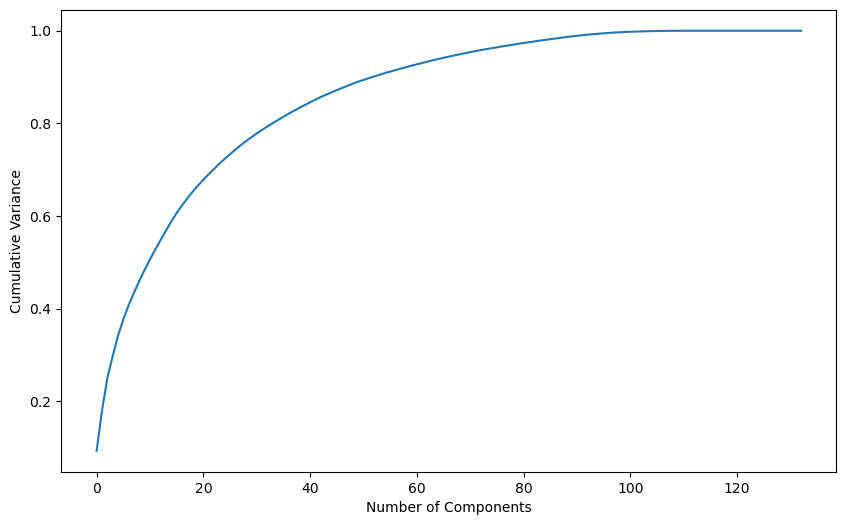

In [94]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

### We can see that 60 components explain amost more than 90% variance of the data. So, we will perform PCA with 60 components.

In [95]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [96]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)

In [97]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

We are only doing Transform in the test set not the Fit-Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.

In [98]:
X_test_pca = pca_final.transform(X_test)

## Model Evaluation

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [100]:
logreg = LogisticRegression()

model = logreg.fit(X_train_pca, y_train)

y_train_pred = model.predict(X_train_pca)

### Training Validation Matrix

In [101]:
print ('Accuracy: ', accuracy_score(y_train, y_train_pred))
print ('F1 score: ', f1_score(y_train, y_train_pred))
print ('Recall: ', recall_score(y_train, y_train_pred))
print ('Precision: ', precision_score(y_train, y_train_pred))
print ('\n clasification report:\n', classification_report(y_train,y_train_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_train, y_train_pred))

Accuracy:  0.9241919360213262
F1 score:  0.3582510578279267
Recall:  0.24660194174757283
Precision:  0.654639175257732

 clasification report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     21948
           1       0.65      0.25      0.36      2060

    accuracy                           0.92     24008
   macro avg       0.79      0.62      0.66     24008
weighted avg       0.91      0.92      0.91     24008


 confussion matrix:
 [[21680   268]
 [ 1552   508]]


### Test Validation Matrix

In [102]:
y_test_pred = model.predict(X_test_pca)
print ('Accuracy: ', accuracy_score(y_test, y_test_pred))
print ('F1 score: ', f1_score(y_test, y_test_pred))
print ('Recall: ', recall_score(y_test, y_test_pred))
print ('Precision: ', precision_score(y_test, y_test_pred))
print ('\n clasification report:\n', classification_report(y_test,y_test_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred))

Accuracy:  0.9253706480093287
F1 score:  0.3829201101928375
Recall:  0.2607879924953096
Precision:  0.7202072538860104

 clasification report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5470
           1       0.72      0.26      0.38       533

    accuracy                           0.93      6003
   macro avg       0.83      0.63      0.67      6003
weighted avg       0.91      0.93      0.91      6003


 confussion matrix:
 [[5416   54]
 [ 394  139]]


In [103]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [104]:
from sklearn.metrics import roc_curve, auc

In [105]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

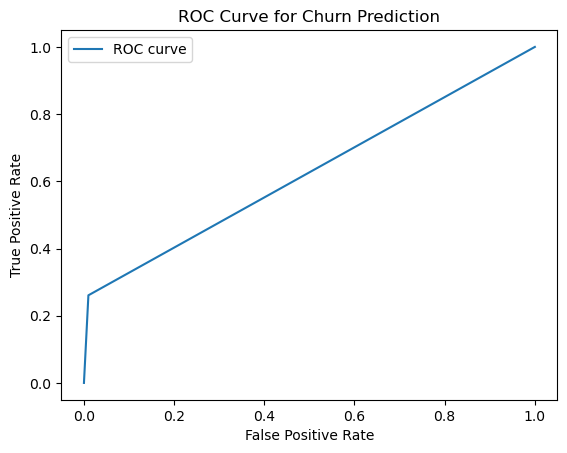

In [106]:
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Churn Prediction')
plt.legend()
plt.show()
